## 1. Seasonal Decomposition

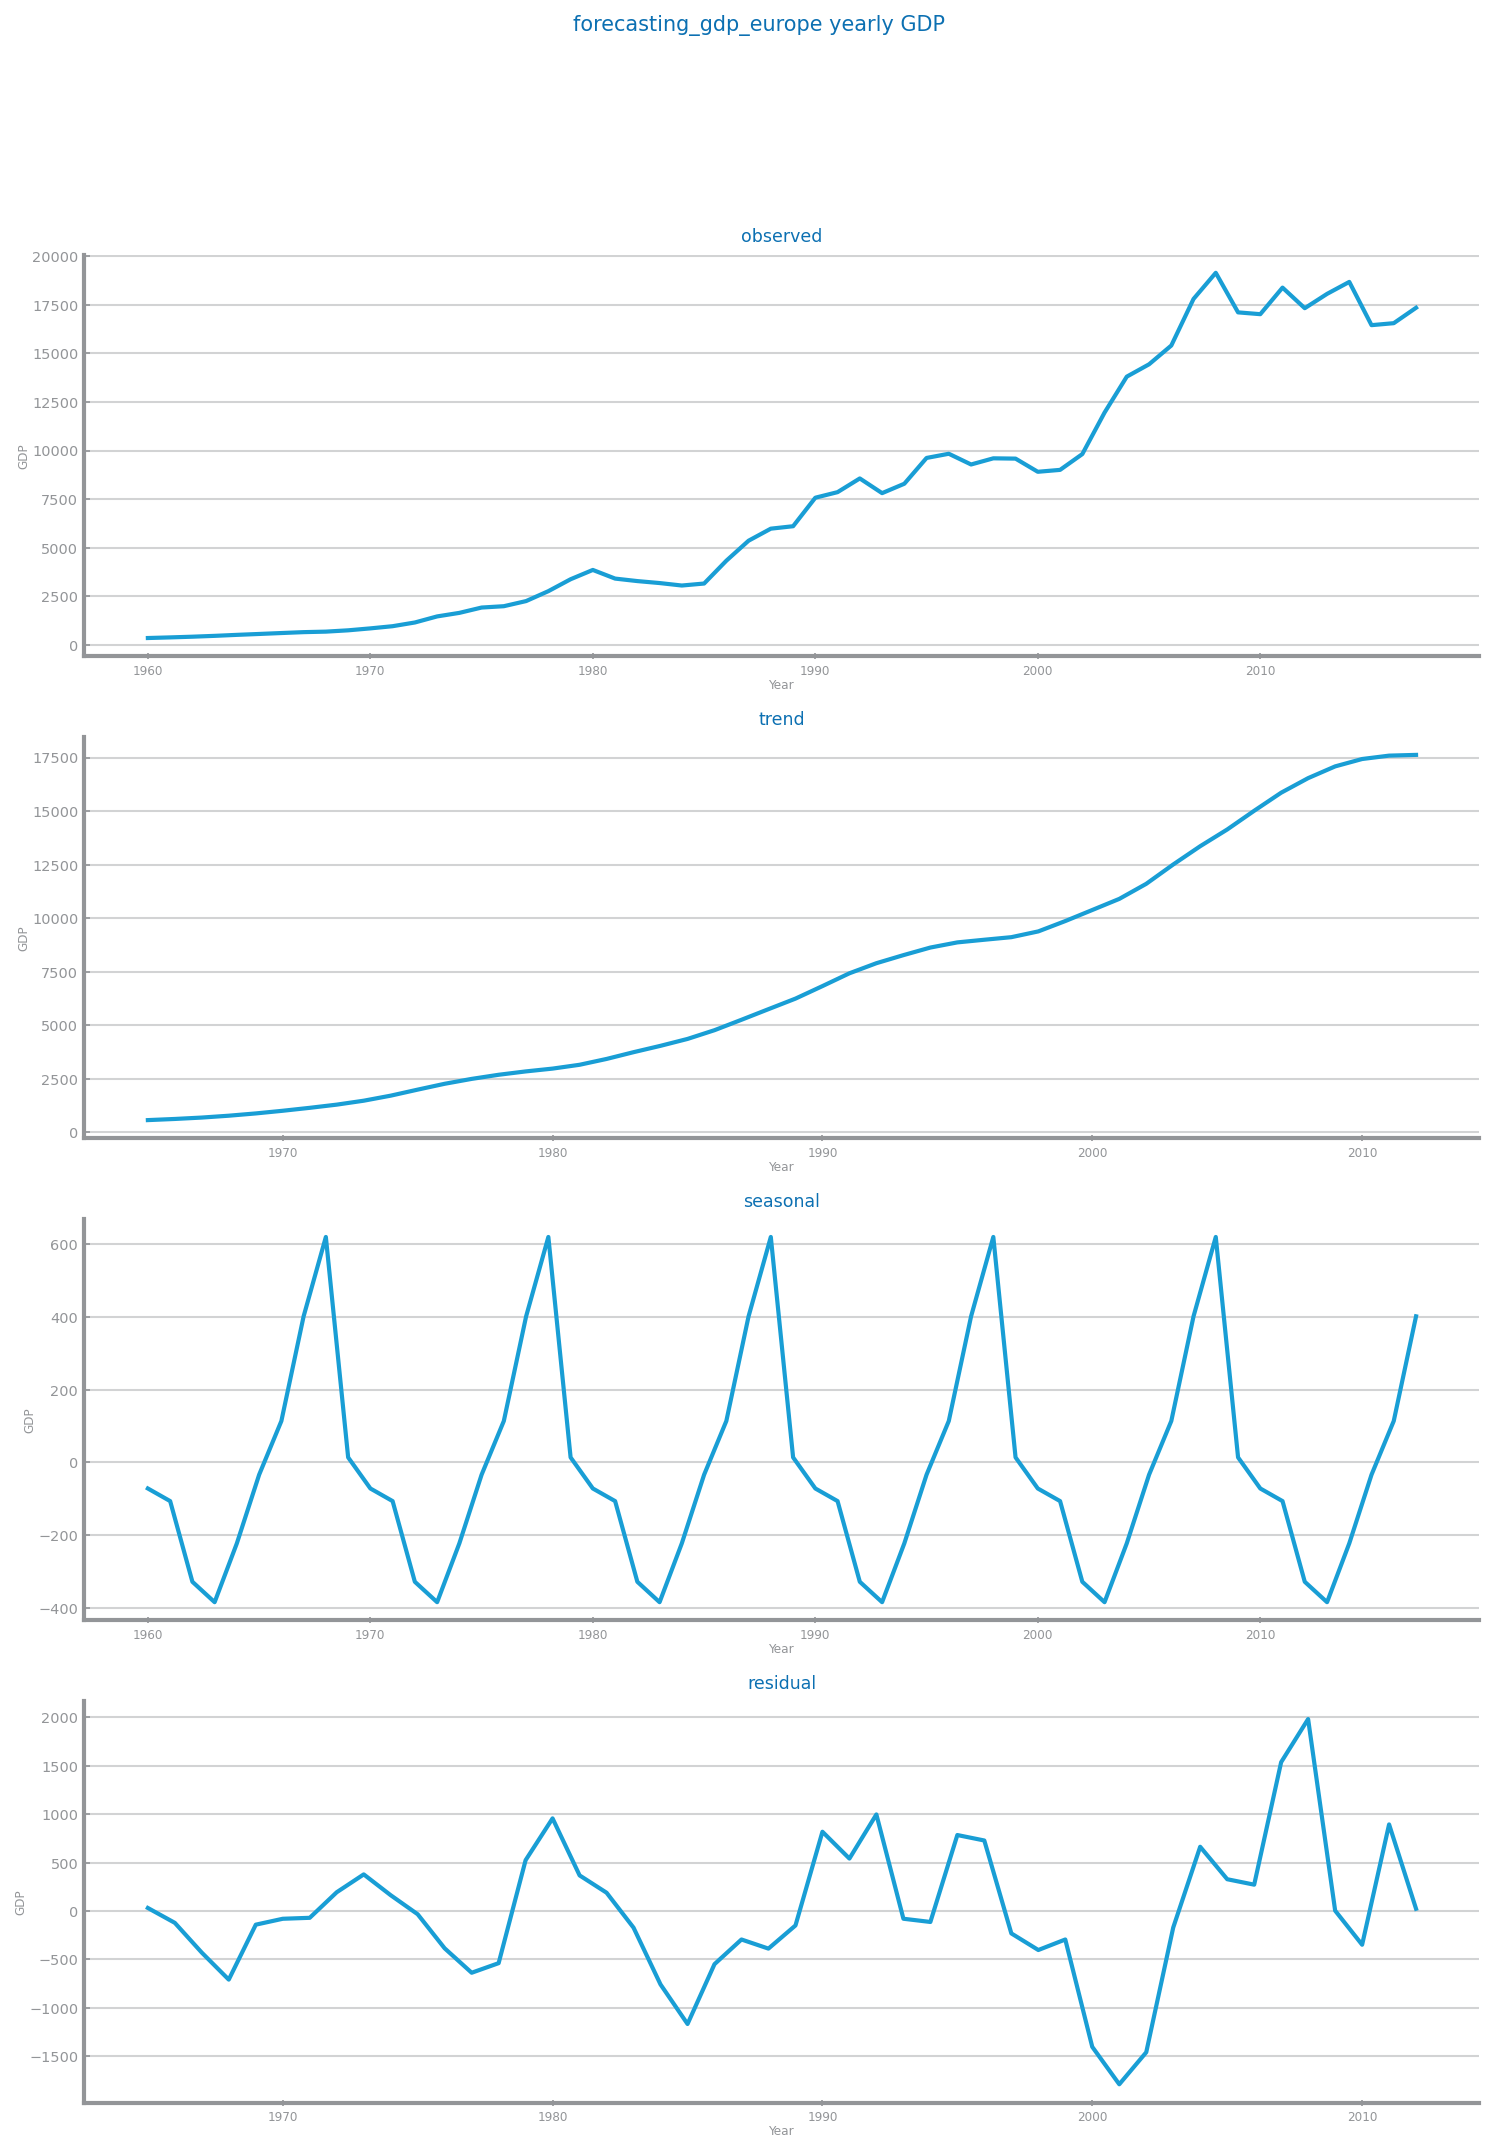

In [2]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import subplots, show
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from statsmodels.tsa.seasonal import seasonal_decompose
from dslabs_functions import HEIGHT, set_chart_labels

# Define the function to plot seasonal decomposition components
def plot_components(
    series: Series,
    title: str = "",
    x_label: str = "time",
    y_label: str = "",
    period: int = 10,  # Adjusted for decadal patterns
) -> list[Axes]:
    # Perform seasonal decomposition with appropriate periodicity
    decomposition = seasonal_decompose(series, model="add", period=period)
    components = {
        "observed": series,
        "trend": decomposition.trend,
        "seasonal": decomposition.seasonal,
        "residual": decomposition.resid,
    }
    rows = len(components)
    fig, axs = subplots(rows, 1, figsize=(3 * HEIGHT, rows * HEIGHT))
    fig.suptitle(f"{title}")

    for i, (key, component) in enumerate(components.items()):
        set_chart_labels(axs[i], title=key, xlabel=x_label, ylabel=y_label)
        axs[i].plot(series.index, component)

    return axs

# File details
file_tag = "forecasting_gdp_europe"
filename = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
index = "Year"
target = "GDP"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=",",  # Comma-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Year column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Extract the GDP series
series: Series = data[target]

# Define period based on the nature of the data
period = 10  # Adjust for a decadal pattern, or use len(series) // 2 for shorter data

# Apply seasonal decomposition and plot components
plot_components(
    series,
    title=f"{file_tag} yearly {target}",
    x_label="Year",
    y_label=target,
    period=period,
)
show()


## 2. Stationarity Study

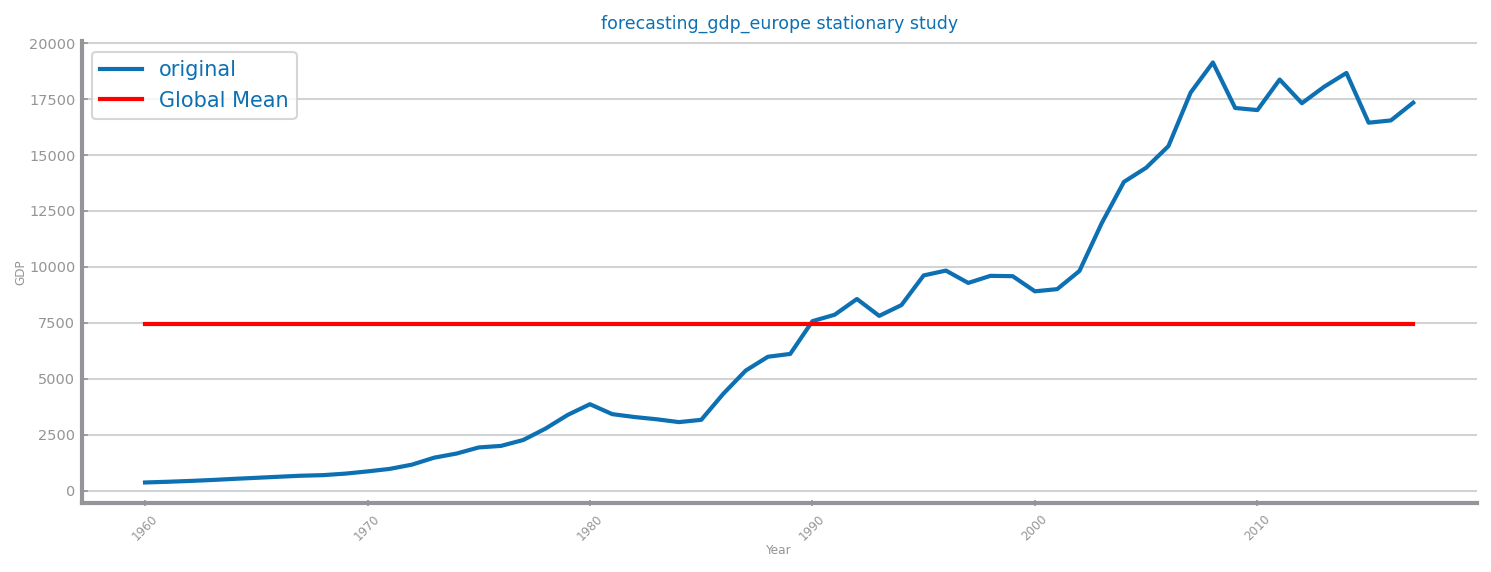

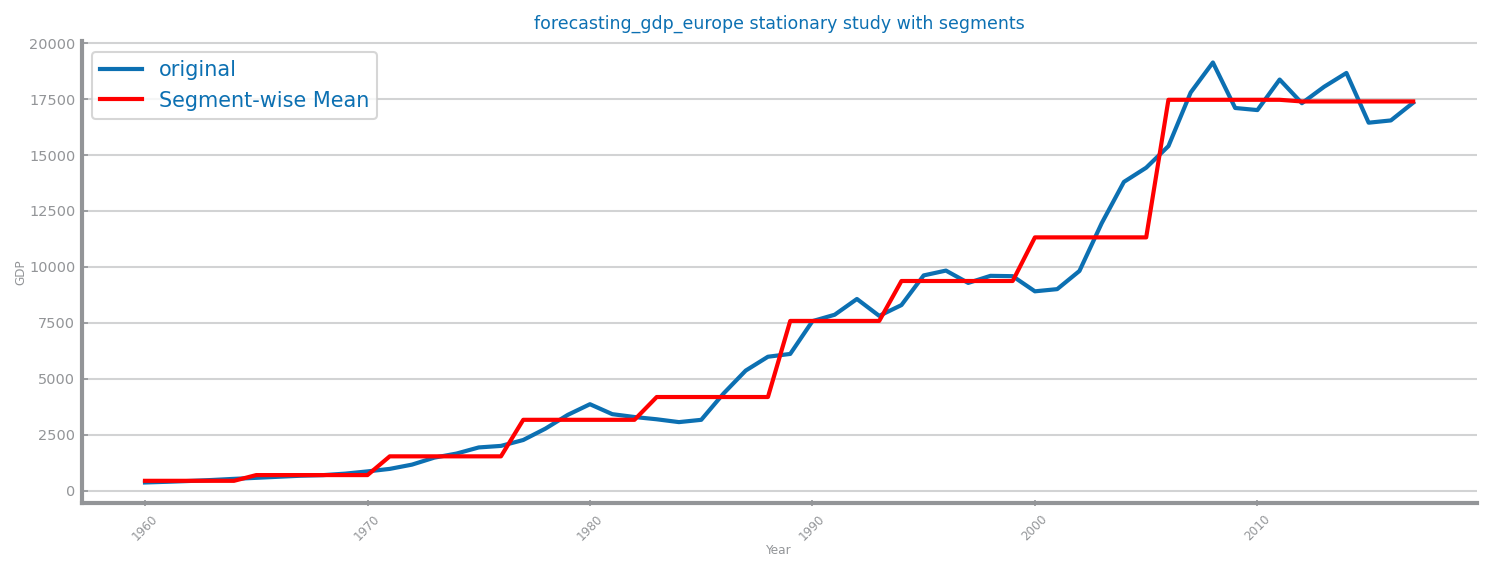

In [3]:
from matplotlib.pyplot import plot, legend, figure
from dslabs_functions import plot_line_chart

# Stationarity study: plot original series with mean and standard deviation
n: int = len(series)
mean_line = [series.mean()] * n  # Global mean line

# Plot original series with global mean
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name if series.index.name else "Year",  # Use "Year" if no index name
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
plot(series.index, mean_line, "r-", label="Global Mean")  # Red line for global mean
legend()
show()

# Segment-wise mean study
BINS = 10  # Number of segments
mean_line = []

# Calculate segment-wise mean
for i in range(BINS):
    start_idx = i * n // BINS
    end_idx = (i + 1) * n // BINS
    segment = series.iloc[start_idx:end_idx]
    mean_value = [segment.mean()] * len(segment)
    mean_line.extend(mean_value)

# Handle remaining values if n is not divisible by BINS
remaining_values = n - len(mean_line)
if remaining_values > 0:
    mean_line.extend([mean_line[-1]] * remaining_values)

# Plot original series with segment-wise mean
figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name if series.index.name else "Year",
    ylabel=target,
    title=f"{file_tag} stationary study with segments",
    name="original",
)
plot(series.index, mean_line, "r-", label="Segment-wise Mean")  # Red line for segment-wise mean
legend()
show()


## 3. Augmented Dickey-Fuller Test

In [4]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series

# Define a function to evaluate stationarity
def eval_stationarity(series: Series) -> bool:
    """
    Evaluate the stationarity of a time series using the Augmented Dickey-Fuller test.
    
    Parameters:
        series (Series): The time series to test.
    
    Returns:
        bool: True if the series is stationary, False otherwise.
    """
    try:
        result = adfuller(series.dropna())  # Drop NaN values to avoid issues
        print("Augmented Dickey-Fuller Test Results:")
        print(f"ADF Statistic: {result[0]:.3f}")
        print(f"p-value: {result[1]:.3f}")
        print("Critical Values:")
        for key, value in result[4].items():
            print(f"\t{key}: {value:.3f}")
        
        # Determine stationarity based on p-value
        is_stationary = result[1] <= 0.05
        print(f"The series {('is' if is_stationary else 'is not')} stationary.")
        return is_stationary
    except Exception as e:
        print(f"Error evaluating stationarity: {e}")
        return False

# Evaluate and print stationarity results
is_stationary = eval_stationarity(series)


Augmented Dickey-Fuller Test Results:
ADF Statistic: -0.608
p-value: 0.869
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596
The series is not stationary.
